# ALDS Tutorial 2: Containers, zoeken, sorteren

Ja!!! Welkom terug! Ik hoop dat jullie week 1 goed door zijn gekomen en weer zin hebben in week 2! 

Laten we eerst weer eens even beginnen met het doen van de nodige imports: 

In [1]:
import sys

# Asserts zijn handig: ingebouwde unit-testjes in Python
assert sys.version_info.major == 3, "You need python 3."
print("Python version is {} -> okay".format(sys.version_info[0:30]))

import IPython

assert IPython.version_info[0] >= 7, "You need IPython >= 7"
print("IPython version is {} -> okay".format(IPython.version_info))


from matplotlib import pyplot as plt
import numpy as np
import time
import statistics as stats
import copy
import math


Python version is (3, 9, 13, 'final', 0) -> okay
IPython version is (7, 29, 0, '') -> okay


Deze tutorial gaat weer gebruik maken van numpy arrays (np.array). Dit is een ontzettend fijn datatype dat erg geoptimaliseerd is (zowel qua memory, als runtime voor allerhande standaardfuncties). Bovendien is er gebruik van numpy arrays enorm flexibel. Deze datastructuur is dusdanig veel gebruikt en heeft zoveel impact gehad dat er een Nature-artikel (dat is één van de belangrijkste wetenschappelijke tijdschriften) over is verschenen: https://www.nature.com/articles/s41586-020-2649-2 (Zeker de moeite waard om eens te lezen). 

Qua tips voor het gebruik van numpy arrays raad ik de volgende youtube tutorial aan: https://www.youtube.com/watch?v=8Mpc9ukltVA

Wij gaan nu een aantal opdrachten doen waarbij we gebruik gaan maken van deze numpy arrays om datastructuren te maken op kop van een array. (Deze gebruik ik liever dan de Python list, omdat numpy arrays zoals gezegd echte arrays zijn.) 

## Opgave 1: een eigen Stack (een plek op silicoon)

Schrijf een eigen Stack-klasse op basis van een numpy array, waar alleen integers in mogen. Je mag zelf kiezen welk soort integers want in numpy mag je kiezen hoe groot de ints mogen zijn en of ze signed of unsigned moeten zijn. Je kan hiervoor dtype gebruiken bij het aanmaken van de array, bijvoorbeeld: dtype='int16' levert 16bit signed integers op. 

De Stack heeft een fixed capacity (de grootte van de array). Implementeer een klasse MyStack, waar in ieder geval de volgende functies in verwerkt zijn. Zet bij elke functie van de klasse een runtime-complexity analyse (dus de complexiteit middels de big-Oh notatie, en een korte uitleg daarvan). 
* push(int) (Zet een item op "kop" van de lijst - je mag zelf kiezen hoe de Stack groeit, return een boolean die zegt of het pushen gelukt it. Pushen lukt namelijk niet als de maximale capaciteit bereikt is.)
* pop() (Return en verwijder het element dat nu op kop van de Stack staat) 
* peek() (Return het element op kop van de Stack, maar verwijder hem niet) 
* isEmpty() (Return of de Stack nu leeg is, d.w.z., er nu geen elementen in staan)
* isFull() (Return of the maxCapacity bereikt is)

Daarna willen we graag de capaciteit kunnen vergroten. Voeg een functie toe 
* doubleCapacity() (Verdubbel de capaciteit van de Stack. Zorg ervoor dat de volgorde van de elementen op de Stack in tact blijft.) Wat is de runtime complexity (big-Oh) van deze functie? Leg dit uit in het commentaar.

Bedenk goede unit tests om de werking van de Stack te testen. Gebruik hiervoor het Python-commando "assert" (voor een voorbeeld, zie vorige tutorial). 

In [2]:
class myStack:
    """
    Class to make a stack

    EXAMPLE
    --------
    >>> stack = mystack(42)
    """
    # Deze methode heeft een runtime van O(...), omdat...
    def __init__(self, max_capacity):
        self.stack = np.array([], np.int16)
        self.max_capacity = max_capacity
        self.current = 0
        """
        Constructor for Class myStack

        PARAMETERS
        ------------
        self	:	self
        max_capacity: the maximimum number of elements allowed on the stack.

        EXAMPLE
        --------
        >>> stack = mystack(42)
        """
        # self.array = ....

    # Vul zelf de overige functies aan.

    def push(self, value): # O(1) er wordt direct iets achter de stack gezet het controleren of de stack vol is, is een constante
        if self.current < self.max_capacity:
            self.stack = np.append(self.stack, value)
            self.current += 1
            return True
        else:
            return False
        
    def pop(self): # O(1) er wordt direct iets achteraan de stack afgehaald het controleren of de stack vol niet leeg is, is een constante
        if self.current > 0:
            self.current -= 1
            res = self.stack[self.current]
            self.stack = np.delete(self.stack, self.current)
            return res
        
    def peek(self): # O(1) er wordt een check gedaan naar 1 getal, dit is een constante en kan genegeerd worden.
        if self.current > 0:
            return self.stack[self.current - 1]
        
    def isEmpty(self): # O(1) er wordt een check gedaan naar 1 getal, dit is een constante en kan genegeerd worden.
        if self.current == 0:
            return True
        else:
            return False
        
    def isFull(self): # O(1) er wordt een check gedaan naar 1 getal, dit is een constante en kan genegeerd worden.
        if self.current == self.max_capacity:
            return True
        else:
            return False
        
    def doubleCapacity(self): # O(1) de capaciteit wordt verhoogt en de huidige array blijft hetzelfde, deze wordt niet gekoppieerd omdat numpy arrays geen vaste size hebben.
        self.max_capacity *=2
        
stack = myStack(5)
assert stack.isEmpty() == True, "Array hoort leeg te zijn"
stack.push(17)
stack.push(24)
stack.push(33)
stack.push(41)
stack.push(56)
np.testing.assert_array_equal(stack.stack, np.array([17, 24, 33, 41, 56]), "Array is niet correct")
assert stack.isFull() == True, "Array hoort vol te zijn"
assert stack.push(66) == False, "Array hoort vol te zijn"
first_out = stack.pop()
assert first_out == 56
np.testing.assert_array_equal(stack.stack, np.array([17, 24, 33, 41]), "Array is niet correct")
assert stack.peek() == 41, "De kop klopt niet"
np.testing.assert_array_equal(stack.stack, np.array([17, 24, 33, 41]), "De array is gewijzigd na de peek")
stack.push(56)
np.testing.assert_array_equal(stack.stack, np.array([17, 24, 33, 41, 56]), "Array is niet correct")
stack.doubleCapacity()
assert stack.push(66) == True, "Max capacity van array hoort te zijn verdubbeld"
np.testing.assert_array_equal(stack.stack, np.array([17, 24, 33, 41, 56, 66]), "Array is niet correct")
stack.push(72)
stack.push(83)
stack.push(96)
stack.push(103)
np.testing.assert_array_equal(stack.stack, np.array([17, 24, 33, 41, 56, 66, 72, 83, 96, 103]), "Array is niet correct")
assert stack.push(111) == False, "Max capacity hoort bereikt te zijn"



## Opgave 2: Quick-sort en meer Quick-sort

De runtime van Quick-sort is erg afhankelijk van de keuze van de pivot. We gaan in deze opgave hiervoor verschillende alternatieven bekijken en vergelijken om te zien wat daar het effect van is; zowel theoretisch (in termen van de big-Oh) als in de praktijk (door runtime te meten). 

* Schrijf een functie voor het sorteren van een numpy array met Quicksort. (Zie Algoritmes 16 en 17 van hoofdstuk 7.3 in de reader)
* Pas de functie zo aan dat het aantal keer dat twee waardes vergeleken worden ook wordt gereturnt (naast de gesorteerde lijst). (NB: in Python kan je meerdere dingen tegelijk teruggeven bij een functie.) 
* Schrijf een test-functie, waarbij de gemiddelde waarde van het (bovenstaande) aantal vergelijkingen wordt geschat, door het algoritme X keer voor verschillende random lijsten van lengte L te runnen. Geef naast dit gemiddelde ook de standaardafwijking (standard deviation) terug.  
* Schrijf nu een tweede versie van quick-sort, maar nu zo dat de pivot anders wordt gekozen. Namelijk, neem de minimale waarde van tussen (en inclusief) $lo$ en $hi$ (in de array $a$) als de pivot. Geef wederom het aantal vergelijkingen terug. 
* Vergelijk de twee versies van quicksort voor verschillende groottes van arrays, en plot de resultaten middels matplotlib.pyplot (zoals we ook in de vorige tutorial hadden gedaan), vergeet niet de standaardafwijking mee te plotten als een error region. 
* Wat valt je op in de resultaten? Was dit wat je verwachtte? Verklaar je antwoord met een verwijzing naar de time complexity (big-Oh) van QuickSort. 
* Laten we nog eens iets anders proberen voor de pivot. Schrijf nog een alternatieve versie van quicksort die op regel 1 in plaats van een random pivot of de minimumwaarde, nu de **mediaan** van de elementen tussen $lo$ and $hi$ (uit $a$) pakt. Voor de mediaan pakken we de middelste waarde. Bijvoorbeeld, de mediaan van {1, 7, 3, 8, 3, 9, 6} is 6. In Python 3 is dit geïmplementeerd met de standaardfunctie **median()** in de **statistics** module. 
* Vergelijk deze nieuwe versie door middel van je testfunctie voor verschillende groottes van inputlijsten, en voeg de resultaten toe aan je plot. 
* Schrijf nu een nieuwe testfunctie die de resultaten in termen van runtime vergelijkt in plaats van het aantal vergelijkingen, en plot de resultaten voor de drie alternatieve quick-sorts. 
* Licht de resultaten toe, en verklaar de verschillen?
* Wat het een goed idee om de mediaan te pakken als pivot? Waarom wel/niet? (Gebruik de time complexity in termen van big-Oh om hier antwoord op te geven.) 

[12 17 28 32 34 39 47 55 99] Quicksorted met hoogste index in  17  vergelijkingen
[12 17 28 32 34 39 47 55 99] Quicksorted met minimum in  44  vergelijkingen
[12 17 28 32 34 39 47 55 99] Quicksorted met mediaan in  21  vergelijkingen


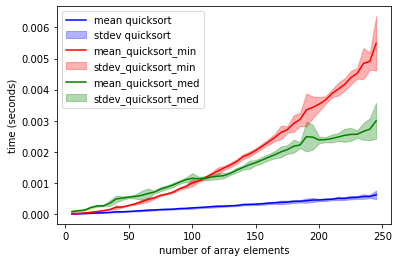

In [3]:
# Schrijf hier de code voor opgave 2

def counted(f):
    def wrapped(*args, **kwargs):
        wrapped.calls += 1
        return f(*args, **kwargs)
    wrapped.calls = 0
    return wrapped

@counted
def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        partition.counted += 1
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
    (array[i + 1], array[high]) = (array[high], array[i + 1])
    return i + 1

@counted
def partition_min(array, low, high):
    pivot = array[low]
    for k in range(low, high + 1):
        if array[k] < pivot:
            pivot = array[k]
    i = low - 1
    for j in range(low, high + 1):
        partition.counted += 1
        if array[j] <= pivot:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
    return i

@counted
def partition_med(array, low, high):
    # if (high +1) + low % 2 == 1:
    #     med = np.median(array[low:high+1])
    #     difference_array = np.absolute(array-med)
    # elif (high +1) + low % 2 == 0:
    #     med = np.median(array[low:high+1])
    #     difference_array = np.absolute(array-med)
    #     index = difference_array.argmin()\
    med = np.median(array[low:high+1])
    difference_array = np.absolute(array-med)
    median_index = difference_array.argmin()
    i = low - 1
    for j in range(low, high + 1):
        partition.counted += 1
        if array[j] <= array[median_index]:
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
            if j == median_index:
                median_index = i
    (array[i], array[median_index]) = (array[median_index], array[i])
    return i

def quickSort(array, low, high):
    if low >= high:
        return array
    else:
        piv = partition(array, low, high)
        quickSort(array, low, piv - 1)
        quickSort(array, piv+ 1, high)
        return array
    
def quickSort_min(array, low, high):
    if low >= high:
        return array
    else:
        piv = partition_min(array, low, high)
        quickSort_min(array, low, piv - 1)
        quickSort_min(array, piv+ 1, high)
        return array
    
def quickSort_med(array, low, high):
    if low >= high:
        return array
    else:
        piv = partition_med(array, low, high)
        quickSort_med(array, low, piv - 1)
        quickSort_med(array, piv+ 1, high)
        return array

test = np.array([34, 17, 99, 12, 55, 39, 32, 28, 47])
partition.counted = 0
sorted = quickSort(test, 0, test.size - 1)
print (sorted,"Quicksorted met hoogste index in ", partition.counted, " vergelijkingen")

test = np.array([34, 17, 99, 12, 55, 39, 32, 28, 47])
partition.counted = 0
sorted = quickSort_min(test, 0, test.size - 1)
print (sorted,"Quicksorted met minimum in ", partition.counted, " vergelijkingen")

test = np.array([34, 17, 99, 12, 55, 39, 32, 28, 47])
partition.counted = 0
sorted = quickSort_med(test, 0, test.size - 1)
print (sorted,"Quicksorted met mediaan in ", partition.counted, " vergelijkingen")

mean_quicksort=[]
stdev_quicksort=[]
mean_quicksort_min=[]
stdev_quicksort_min=[]
mean_quicksort_med=[]
stdev_quicksort_med=[]
meetpunten = list(range(5, 250, 5))

for i in meetpunten:
    quick = []
    quick_min = []
    quick_med = []
    for j in range(100):  # 100 metingen per datapunt
        array = np.random.randint(0, high=1000, size=i, dtype="l")
        array2 = copy.copy(array)
        array3 = copy.copy(array)

        t1 = time.perf_counter()
        res = quickSort(array, 0, array.size-1)
        t2 = time.perf_counter()
        quick.append(t2 - t1)

        t1 = time.perf_counter()
        res = quickSort_min(array2, 0, array.size-1)
        t2 = time.perf_counter()
        quick_min.append(t2 - t1)

        t1 = time.perf_counter()
        res = quickSort_med(array3, 0, array.size-1)
        t2 = time.perf_counter()
        quick_med.append(t2 - t1)
    mean_quicksort.append(stats.mean(quick))
    stdev_quicksort.append(stats.stdev(quick))
    mean_quicksort_min.append(stats.mean(quick_min))
    stdev_quicksort_min.append(stats.stdev(quick_min))
    mean_quicksort_med.append(stats.mean(quick_med))
    stdev_quicksort_med.append(stats.stdev(quick_med))

plt.plot(meetpunten, mean_quicksort, "b-")
plt.fill_between(
    meetpunten,
    np.array(mean_quicksort) - np.array(stdev_quicksort),
    np.array(mean_quicksort) + np.array(stdev_quicksort),
    color="b",
    alpha=0.3,
)
plt.plot(meetpunten, mean_quicksort_min, "r-")
plt.fill_between(
    meetpunten,
    np.array(mean_quicksort_min) - np.array(stdev_quicksort_min),
    np.array(mean_quicksort_min) + np.array(stdev_quicksort_min),
    color="r",
    alpha=0.3,
)
plt.plot(meetpunten, mean_quicksort_med, "g-")
plt.fill_between(
    meetpunten,
    np.array(mean_quicksort_med) - np.array(stdev_quicksort_med),
    np.array(mean_quicksort_med) + np.array(stdev_quicksort_med),
    color="g",
    alpha=0.3,
)
plt.xlabel("number of array elements")
plt.ylabel("time (seconds)")
plt.legend(["mean quicksort", "stdev quicksort", "mean_quicksort_min", "stdev_quicksort_min", "mean_quicksort_med", "stdev_quicksort_med"], loc="upper left")
plt.show()

*beantwoordt hier de vragen van opgave 2*

Het is te verwachten dat de normale quicksort iets sneller is, maar dat het verschil niet heel groot zal zijn.
Bij beide gevallen hebben ze nog steeds dezelfde time complexity namelijk O(n2)
Het enige verschil is dat er bij de quicksort_min altijd de worst case scenario wordt gepakt en bij de gewone quicksort zal de worst case minder vaak voorkomen.

In termen van tijdcomplexiteit zal het gebruik van de mediaan zorgen voor een complexiteit van O(n*logn) omdat de mediaan altijd centraal zit. Echter is bij het zoeken van de mediaan, de worst case 2 x O(n) omdat je langs alle elementen moet om de mediaan te vinden en in geval van een array met even aantallen ook lang alle elementen om het index van de dischtbijzijnde waarde van de mediaan te vinden. in dit geval is het niet handig de mediaan te pakken zoals terug te zien in de groene lijn

## Opgave 3: Priority Queue (waarin we zelf een datastructuur gaan kiezen om een andere datastructuur bovenop te bouwen)

**NB: voor deze opgave heb je een partner nodig. (Nee, geen romantische partner, een practicumpartner die ook deze cursus volgt.) Neem contact op met het groepje waarin je bent ingedeeld voor de besprekingsmomenten, en bespreek vooraf de keuzes voor deze opgave (qua datastructuur). Het is van belang dat niet iedereen dezelfde datastructuur pakt namelijk, anders valt er weinig te vergelijken. *Als je niet bent ingedeeld, of je je groepsgenoten reageren niet, neem dan zsm even contactop met Marius of Diederik, dan zoeken we naar een oplossing.*  **

PriorityQueues zijn een datastructuur met de volgende eigenschappen: 
* Het is een wachtrij, waarbij elk element een *prioriteit* toegekend krijgt. Deze prioriteit is meestal een integer, (maar soms kan het ook een float zijn). 
* Bij gelijke *prioriteit* (dus bijvoorbeeld, alle elementen in de rij hebben prioriteit *1*) gedraagt een priority queue zich net zoals een queue; first in first out (FIFO)
* Echter, als er een element met een hogere prioriteit wordt toegevoegd gaat deze eerst. 

Priority Queues worden veel gebruikt bij dingen als task-scheduling binnen applicaties, het OS, of de cloud (https://www.researchgate.net/publication/257726215_A_Priority_Based_Job_Scheduling_Algorithm_in_Cloud_Computing), wachtrijen voor verzenden (telefoongespreken zijn belangrijker dan e-mails want ze moeten real-time) (https://patentimages.storage.googleapis.com/72/1a/c2/7cd0205566e125/US7310670.pdf), maar ook bijvoorbeeld binnen zelf-lerende systemen door te kijken naar welke "ervaringen" de meeste leeropbrengst zouden opleveren (en die dan eerst verwerken) zodat het systeem sneller leert (https://link.springer.com/content/pdf/10.1007/BF00993104.pdf). 

In deze opgave gaan we kijken naar hoe we een priority kunnen bouwen, bovenop eenvoudigere datastructuren. De datastructuur onliggend aan een PriorityQueue zouden we namelijk wel eens anders moeten kunnen willen kiezen dan een gewone queue: het inserten van nieuwe elementen (die nu midden in de queue zouden kunnen komen) is namelijk een stuk lastiger (we zouden makkelijk elementen moeten kunnen toevoegen in het midden van de priority queue).

Enkele tips hierbij: kijk alvast eens naar recursieve datastructuren (volgend college) zoals de doubly linked list. Of verzin zelf een slimme list om priorities er goed in te krijgen. (Je zou bijvoorbeeld voordeel kunnen hebben als je van te voren al weet dat er bijvoorbeeld tien mogelijke prioriteiten zijn - als je zo'n aanname wilt maken, geef dit dan duidelijk aan in het commentaar.) Als je helemaal los wilt gaan, kijk dan eens naar de heap datastructuur (ook wel een heap-boom, https://en.wikipedia.org/wiki/Heap_(data_structure) , NB: dit is niet hetzelfde als de "heap" als rereserveerde geheugenruimte op een chip; daar wordt ongelukkigerwijs helaas dezelfde naam voor gebruikt, maar is iets compleet anders.)

* Onderzoek samen met je practicumpartner mogelijke keuzes voor de onderliggende datastructuur voor een priority queue, en spreek af wie welke gaat doen. (Twee verschillenden)
* Leg voor de keuze die jij zelf gaat implementeren waarom jullie deze gekozen hebben. 
* Implementeer de priority queue met de gekozen datastructuur, en daarbij de volgende functies: 
    * **queue(v, p)** adds value $v$ with priority $p$ to the queue.
    * **dequeue()** returns the value with the highest priority and removes the element from the queue.
    * **contains(v)** returns \textit{True} if and only if the queue contains value $v$.
    * **remove(e)** removes all elements with value $v$ from the queue.
* Analyseer de time complexity van deze priority queue functies zoals je ze hebt geïmplementeerd. Zet je analyse in het commentaar bij de code (zowel de argumentatie als het big-Oh resultaat).
* Schrijf een testfunctie voor alle bovenstaande functies om de runtime te meten bij het inserten (queue) van X random waardes met random prioriteiten, het dequeuen van al deze X waarden, het vinden (contains) van Y random waarden (uiteraard kleiner dan X, en te testen vóór alles gedequeued is), en het removen van Z waarden (wederom kleiner dan X en het best los te testen onafhankelijk van de andere functies). 
* Neem nu de implementatie over van je practicumpartner in een aparte cell, en maak daaronder een runtimevergelijking voor alle vier de functies. Plot de resultaten met matplotlib.pyplot, met zowel de gemiddelden als de standaardafwijken (als error regions), zoals we gewend zijn van de eerste tutorial. 
* Welke verschillen zie je in de plotjes? Kan je dit verklaren? Zijn er bijvoorbeeld verschillen qua time complexity?


*leg hier je keuze voor de onderliggende datastructuur uit*

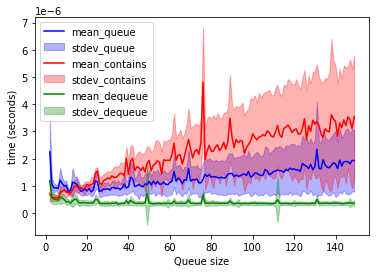

In [21]:
# schrijf hier je eigen implementatie van de priority queue, met runtime analyse in het commentaar, en de testfunctie

class Node:
    def __init__(self, value, priority):
        self.prev = None
        self.next = None
        self.value = value
        self.priority = priority
    def __del__(self):
        pass

class PriorityQueue:
    def __init__(self):
        self.length = 0
        self.head = None
        self.last = None

    def queue(self, value, priority): # de worst case is de else statement waar er door de hele queue wordt geittereerd, hierdoor kom je op een complexiteit van O(n) waarbij n de lengte van de queue is
        newNode = Node(value, priority)
        if self.head == None: # als queue leeg is
            self.head = newNode
            self.last = newNode
            self.length += 1
            return
        elif priority < self.head.priority: # als prioriteit lager (dus belangrijker) dan de eerst volgende is
            self.head.prev = newNode
            newNode.next = self.head
            self.head = newNode
            self.length += 1
            return
        elif priority >= self.last.priority: # als prioriteit hoger (dus minder belangrijk) of gelijk is aan de laatste dan achteraan
            self.last.next = newNode
            newNode.prev = self.last
            self.last = newNode
            self.length += 1
            return
        else: # in alle andere gevallen
            current = self.head
            while priority >= current.priority: # loop om van voor naar achteren te iterereren om zo de juiste plek te vinden
                current = current.next
            current.prev.next = newNode
            newNode.prev = current.prev
            newNode.next = current
            current.prev = newNode
            self.length += 1
            return

    def dequeue(self): # Dit heeft een time complexity van O(1)
        first = self.head
        res = first.value
        if self.length > 1:
            next = self.head.next
            next.prev = None
            self.head = next
        elif self.length == 1:
            self.head = None
            self.last = None
        del first
        self.length -=1
        return res
    
    def contains(self, value): # Dit heeft eem time complexity van O(n) want er wordt door de hele queue geittereerd tot de waarde wordt gevonden
        if self.length > 0:
            current = self.head
            while current is not None: # loop om te iterereren door de queue
                if current.value == value:
                    return "True"
                else:
                    current = current.next
            return "False"
            
    def remove(self, value): # Dit heeft eem time complexity van O(n) want er wordt door de hele queue geittereerd tot alle nodes met het meegegeven waarde eruit zijn.
        if self.length > 0:
            current = self.head
            while current is not None: # loop om te iterereren door de queue
                if current.value == value:
                    if current.prev is None and current.next is None: # dus enige in de queue
                        self.head = None
                        self.last = None
                        del current
                        self.length -=1
                        break
                    elif current.prev is not None and current.next is not None: # dus geen head en geen last
                        current.prev.next = current.next
                        current.next.prev = current.prev
                        next = current.next
                        del current
                        current = next
                    elif current.next is not None: # dus als eerste in de queue is
                        current.next.prev = None
                        self.head = current.next
                        del current
                        current = self.head
                    else: # dus laatste in de queue
                        current.prev.next = None
                        self.last = current.prev
                        del current
                        current = self.last
                    self.length -=1
                else:
                    current = current.next
                    
    def viewQueue(self):
        if self.length > 0:
            queue = []
            current = self.head
            while current is not None: # loop om te iterereren door de queue
                queue.append(current.value)
                current = current.next
            return queue

pQueue = PriorityQueue()

mean_queue=[]
stdev_queue=[]
mean_contains=[]
stdev_contains=[]
mean_dequeue=[]
stdev_dequeue=[]

meetpunten = list(range(2, 150, 1)) #Queue grotes

for i in meetpunten:
    queue = []
    contains = []
    dequeue = []
    for j in range(i):  # Insert X elements in queue
        randomValue = np.random.randint(0, high=100)
        randomPriority = np.random.randint(0, high=10)
        t1 = time.perf_counter()
        res = pQueue.queue(randomValue, randomPriority)
        t2 = time.perf_counter()
        queue.append(t2 - t1)
    for k in range(i // 2 + 1):  # Search Y elements in queue
        randomSearch = np.random.randint(0, high=100)
        t1 = time.perf_counter()
        res = pQueue.contains(randomSearch)
        t2 = time.perf_counter()
        contains.append(t2 - t1)
    for l in range(i):  # # Pop X elements from queue
        t1 = time.perf_counter()
        res = pQueue.dequeue()
        t2 = time.perf_counter()
        dequeue.append(t2 - t1)
    mean_queue.append(stats.mean(queue))
    stdev_queue.append(stats.stdev(queue))
    mean_contains.append(stats.mean(contains))
    stdev_contains.append(stats.stdev(contains))
    mean_dequeue.append(stats.mean(dequeue))
    stdev_dequeue.append(stats.stdev(dequeue))

plt.plot(meetpunten, mean_queue, "b-")
plt.fill_between(
    meetpunten,
    np.array(mean_queue) - np.array(stdev_queue),
    np.array(mean_queue) + np.array(stdev_queue),
    color="b",
    alpha=0.3,
)
plt.plot(meetpunten, mean_contains, "r-")
plt.fill_between(
    meetpunten,
    np.array(mean_contains) - np.array(stdev_contains),
    np.array(mean_contains) + np.array(stdev_contains),
    color="r",
    alpha=0.3,
)
plt.plot(meetpunten, mean_dequeue, "g-")
plt.fill_between(
    meetpunten,
    np.array(mean_dequeue) - np.array(stdev_dequeue),
    np.array(mean_dequeue) + np.array(stdev_dequeue),
    color="g",
    alpha=0.3,
)
plt.xlabel("Queue size")
plt.ylabel("time (seconds)")
plt.legend(["mean_queue", "stdev_queue", "mean_contains", "stdev_contains", "mean_dequeue", "stdev_dequeue"], loc="upper left")
plt.show()

# Manual Tests:
# pQueue = PriorityQueue()
# pQueue.queue(7, 2)
# pQueue.queue(5, 3)
# pQueue.queue(9, 1)
# pQueue.queue(3, 2)
# pQueue.queue(8, 3)

# print ("Queue:", pQueue.viewQueue())
# print ("head", pQueue.head.value)
# print ("last", pQueue.last.value)
# print ("length of queue: ", pQueue.length)
# print ("")

# print ("The value 9 is in the queue: ", pQueue.contains(9))
# print("popped: ", pQueue.dequeue())
# print ("The value 9 is in the queue: ", pQueue.contains(9))
# print ("")

# print ("Queue:", pQueue.viewQueue())
# print ("head", pQueue.head.value)
# print ("last", pQueue.last.value)
# print ("length of queue: ", pQueue.length)
# print ("")

# pQueue.queue(7, 0)
# pQueue.queue(7, 2)
# pQueue.queue(7, 4)

# print ("Queue:", pQueue.viewQueue())
# print ("head", pQueue.head.value)
# print ("last", pQueue.last.value)
# print ("length of queue: ", pQueue.length)
# print ("")

# pQueue.remove(7)
# print ("removed all nodes with value 7")


# print ("Queue:", pQueue.viewQueue())
# print ("head", pQueue.head.value)
# print ("last", pQueue.last.value)
# print ("length of queue: ", pQueue.length)

    

In [ ]:
# neem hier de code van je practicumpartner over (NB: misschien zul je de class even moeten hernoemen
# maar het is wel handig om dezelfde functienamen te gebruiken)




In [ ]:
# schrijf hier de experimentele vergelijking van jullie vier methodes, en de code om de plotjes te maken

"""
Gezien dit om een herkansing gaat heb ik geen groepspartner, wel heb ik me verdiept in de time complexity van de verschillende data structuren waarop een priority queue gebaseerd kan worden
Unordered Array:
queue:     O(1), want unsorted dus maakt niet uit waar de element wordt geplaatst
dequeue:   O(N), want de hele array moet gecheckt worden op laagste prioriteit, en wie er eerder in de queue is geplaats
contains:  O(N), want worst case staat een element achteraan gezien unsorted
remove:    O(N), want de hele array moet gecheckt worden op de value

Sorted Array:
queue:     O(N), want sorted dus maakt wel uit waar de element wordt geplaatst, kan korter hangt af van de search algoritme
dequeue:   O(1), want element met hoogste prioriteit staat altijd vooraan
contains:  O(N), want worst case staat een element achteraan gezien array is gesorteerd op prioriteit en niet op value
remove:    O(N), want de hele array moet gecheckt worden op de value

Sorted Linked List:
queue:     O(N), want sorted dus maakt wel uit waar de element wordt geplaatst, maar kan niet korter want je kan niet midden in de linked list beginnen
dequeue:   O(1), want element met hoogste prioriteit staat altijd vooraan
contains:  O(N), want worst case staat een element achteraan gezien list is gesorteerd op prioriteit en niet op value
remove:    O(N), want de hele array moet gecheckt worden op de value

Binary Heap:
queue:     O(LogN), want tree structure dus per laag steeds door de helf dat je moet zoeken
dequeue:   O(1), want element met hoogste prioriteit staat altijd bovenaan de tree
contains:  O(N), want de tree is gesorteerd op prioriteiten en niet op value
remove:    O(N), want de hele tree moet gecheckt worden op de value
"""

*verklaar hier de verschillen in runtime tussen de twee implementaties (met verschillende onderliggende datastructuur)*